# How safety are the streets of Santiago?
Marcelo Rovai
- 14 August 2019

## Install and Initialize libraries

In [ ]:
!pip uninstall geopandas -y
!pip install geopandas
!pip uninstall rtree -y
!sudo apt install libspatialindex-dev
!pip install rtree

In [ ]:
!pip install folium spectra

In [1]:
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import folium
import spectra
import geopandas as gpd
from shapely.geometry import Point, LineString, Polygon
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(context='paper', style='ticks', palette='inferno')
sns.mpl.rc("figure", figsize=(10, 6))
mpl.rcParams['figure.dpi']= 150

## Import dataset

[Clilean National Congress Library (BCN) - Vectorial Maps](https://www.bcn.cl/siit/mapas_vectoriales/index_html)

In [3]:
stgo_shape= gpd.read_file("../data/BCN/stgo/stgo.gpkg", layer='stgo')

In [12]:
#!pip install descartes

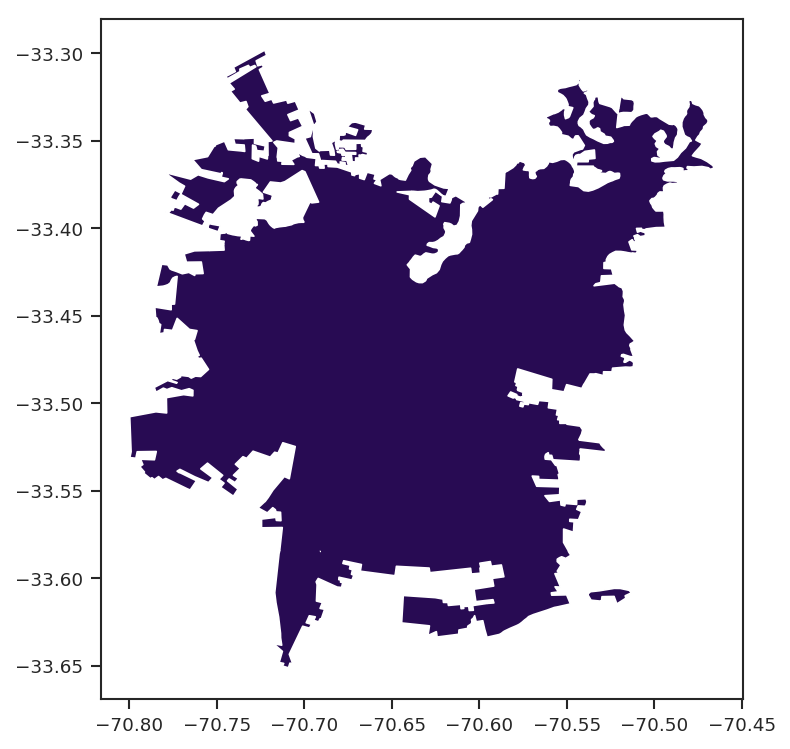

In [13]:
stgo_shape.plot()

In [14]:
stgo_shape.total_bounds

array([-70.79976813, -33.65120143, -70.46601154, -33.29815073])

In [15]:
stgo_shape.centroid

0    POINT (-70.64162 -33.47426)
dtype: geometry

`Plotting only the boundary as a line.`

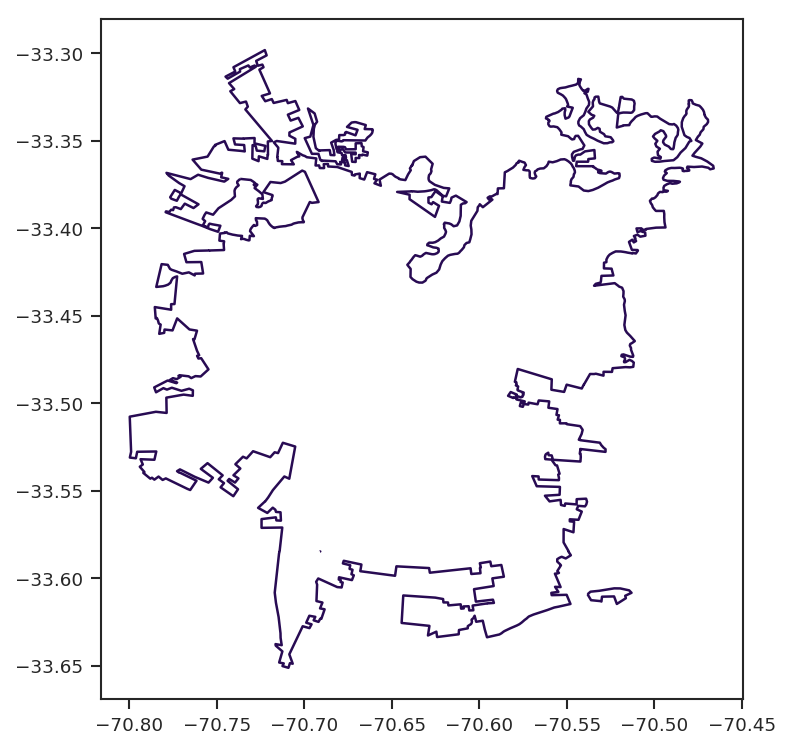

In [16]:
stgo_shape.boundary.plot()

---

## Import Roads Dataset

In [17]:
car_roads = gpd.read_file("../data/OSM_Chile/chile-2020-free-light-version/chile-2020-free-light-version.gpkg", layer='car_roads')

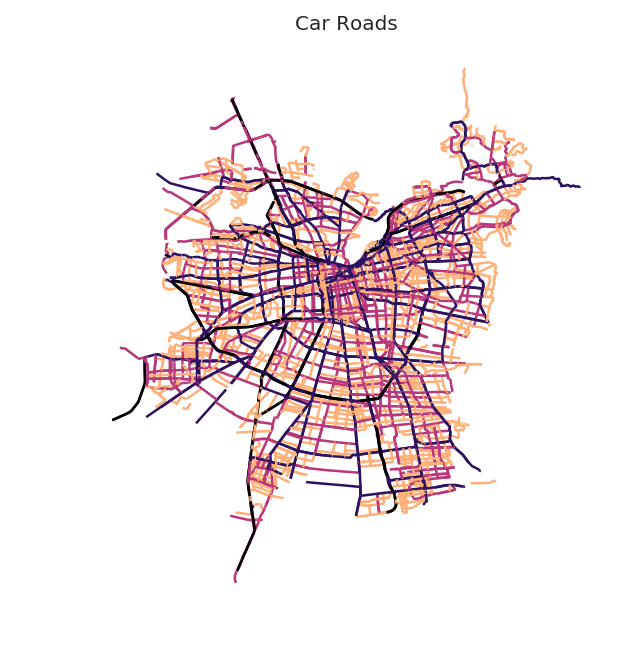

In [18]:
car_roads.plot(markersize=0.01, column='fclass',figsize=(5, 5), cmap = 'magma');
plt.axis('off');
plt.title("Car Roads");

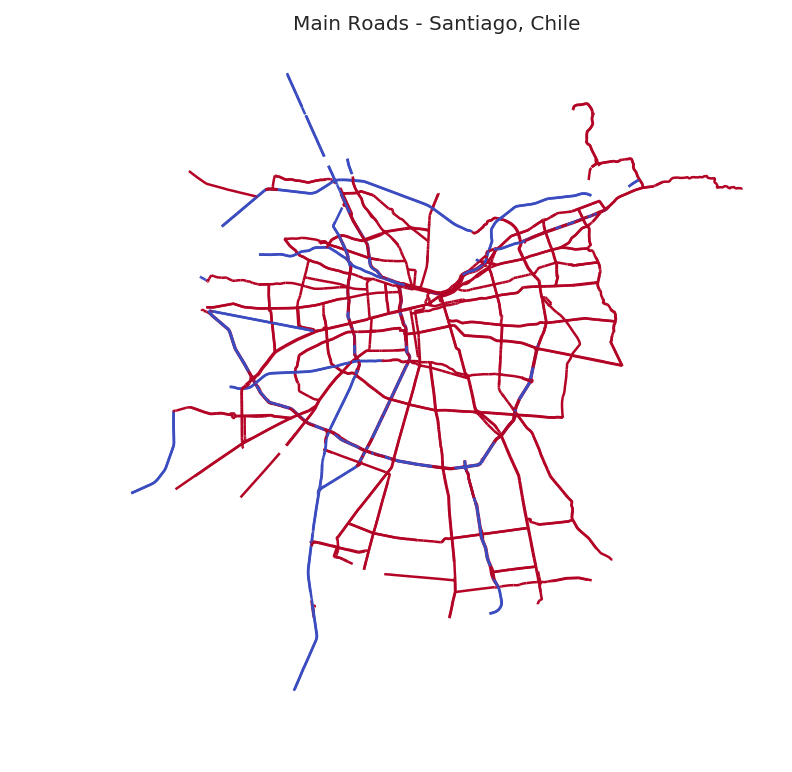

In [19]:
main_roads = car_roads[(car_roads.fclass == 'primary') |
                       (car_roads.fclass == 'motorway')
                      ]
main_roads.plot(column='fclass', cmap = 'coolwarm')
plt.axis('off');
plt.title("Main Roads - Santiago, Chile");

---

## Importing Car Crashes

In [20]:
crashes = gpd.read_file("../data/CONASET/SiniestrosRM2019/SiniestrosRM2019.gpkg", layer='crashes')

In [21]:
crashes.head()

,Ano,Idaccident,Codregion,Region,Comuna,Zona,Calle1,Calle2,Numero,lat,...,Fallecidos,Graves,Menos_Grav,Leves,index_right,NOMBRE,TIPO_AREA,SHAPE_Leng,SHAPE_Area,geometry
0,2019,1167981,13,REGION METROPOLITANA,PUENTE ALTO,URBANA,DOMINGO TOCORNAL,JUAN DE DIOS MALEBRAN,NULL,-33.604076,...,0,0,0,0,0,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.58776 -33.60408)
1,2019,1188851,13,REGION METROPOLITANA,PUENTE ALTO,URBANA,JUAN DE DIOS MALEBRAN,DOMINGO TOCORNAL,NULL,-33.604076,...,0,0,0,0,0,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.58776 -33.60408)
2,2019,1193469,13,REGION METROPOLITANA,PUENTE ALTO,URBANA,JUAN DE DIOS MALEBRAN,DOMINGO TOCORNAL,NULL,-33.604076,...,0,0,0,0,0,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.58776 -33.60408)
3,2019,1202470,13,REGION METROPOLITANA,PUENTE ALTO,URBANA,DOMINGO TOCORNAL,JUAN DE DIOS MALEBRAN,NULL,-33.604076,...,0,0,0,2,0,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.58776 -33.60408)
4,2019,1210086,13,REGION METROPOLITANA,PUENTE ALTO,URBANA,DOMINGO TOCORNAL,JUAN DE DIOS MALEBRAN,NULL,-33.604076,...,0,0,0,0,0,Santiago,Ciudad,427491.444262,5.821041e+08,POINT (-70.58776 -33.60408)


In [22]:
del crashes['index_right']
del crashes['NOMBRE']
del crashes['TIPO_AREA']
del crashes['SHAPE_Leng']
del crashes['SHAPE_Area']

(-70.844025595, -70.431723705, -33.69818925328633, -33.27910128098692)

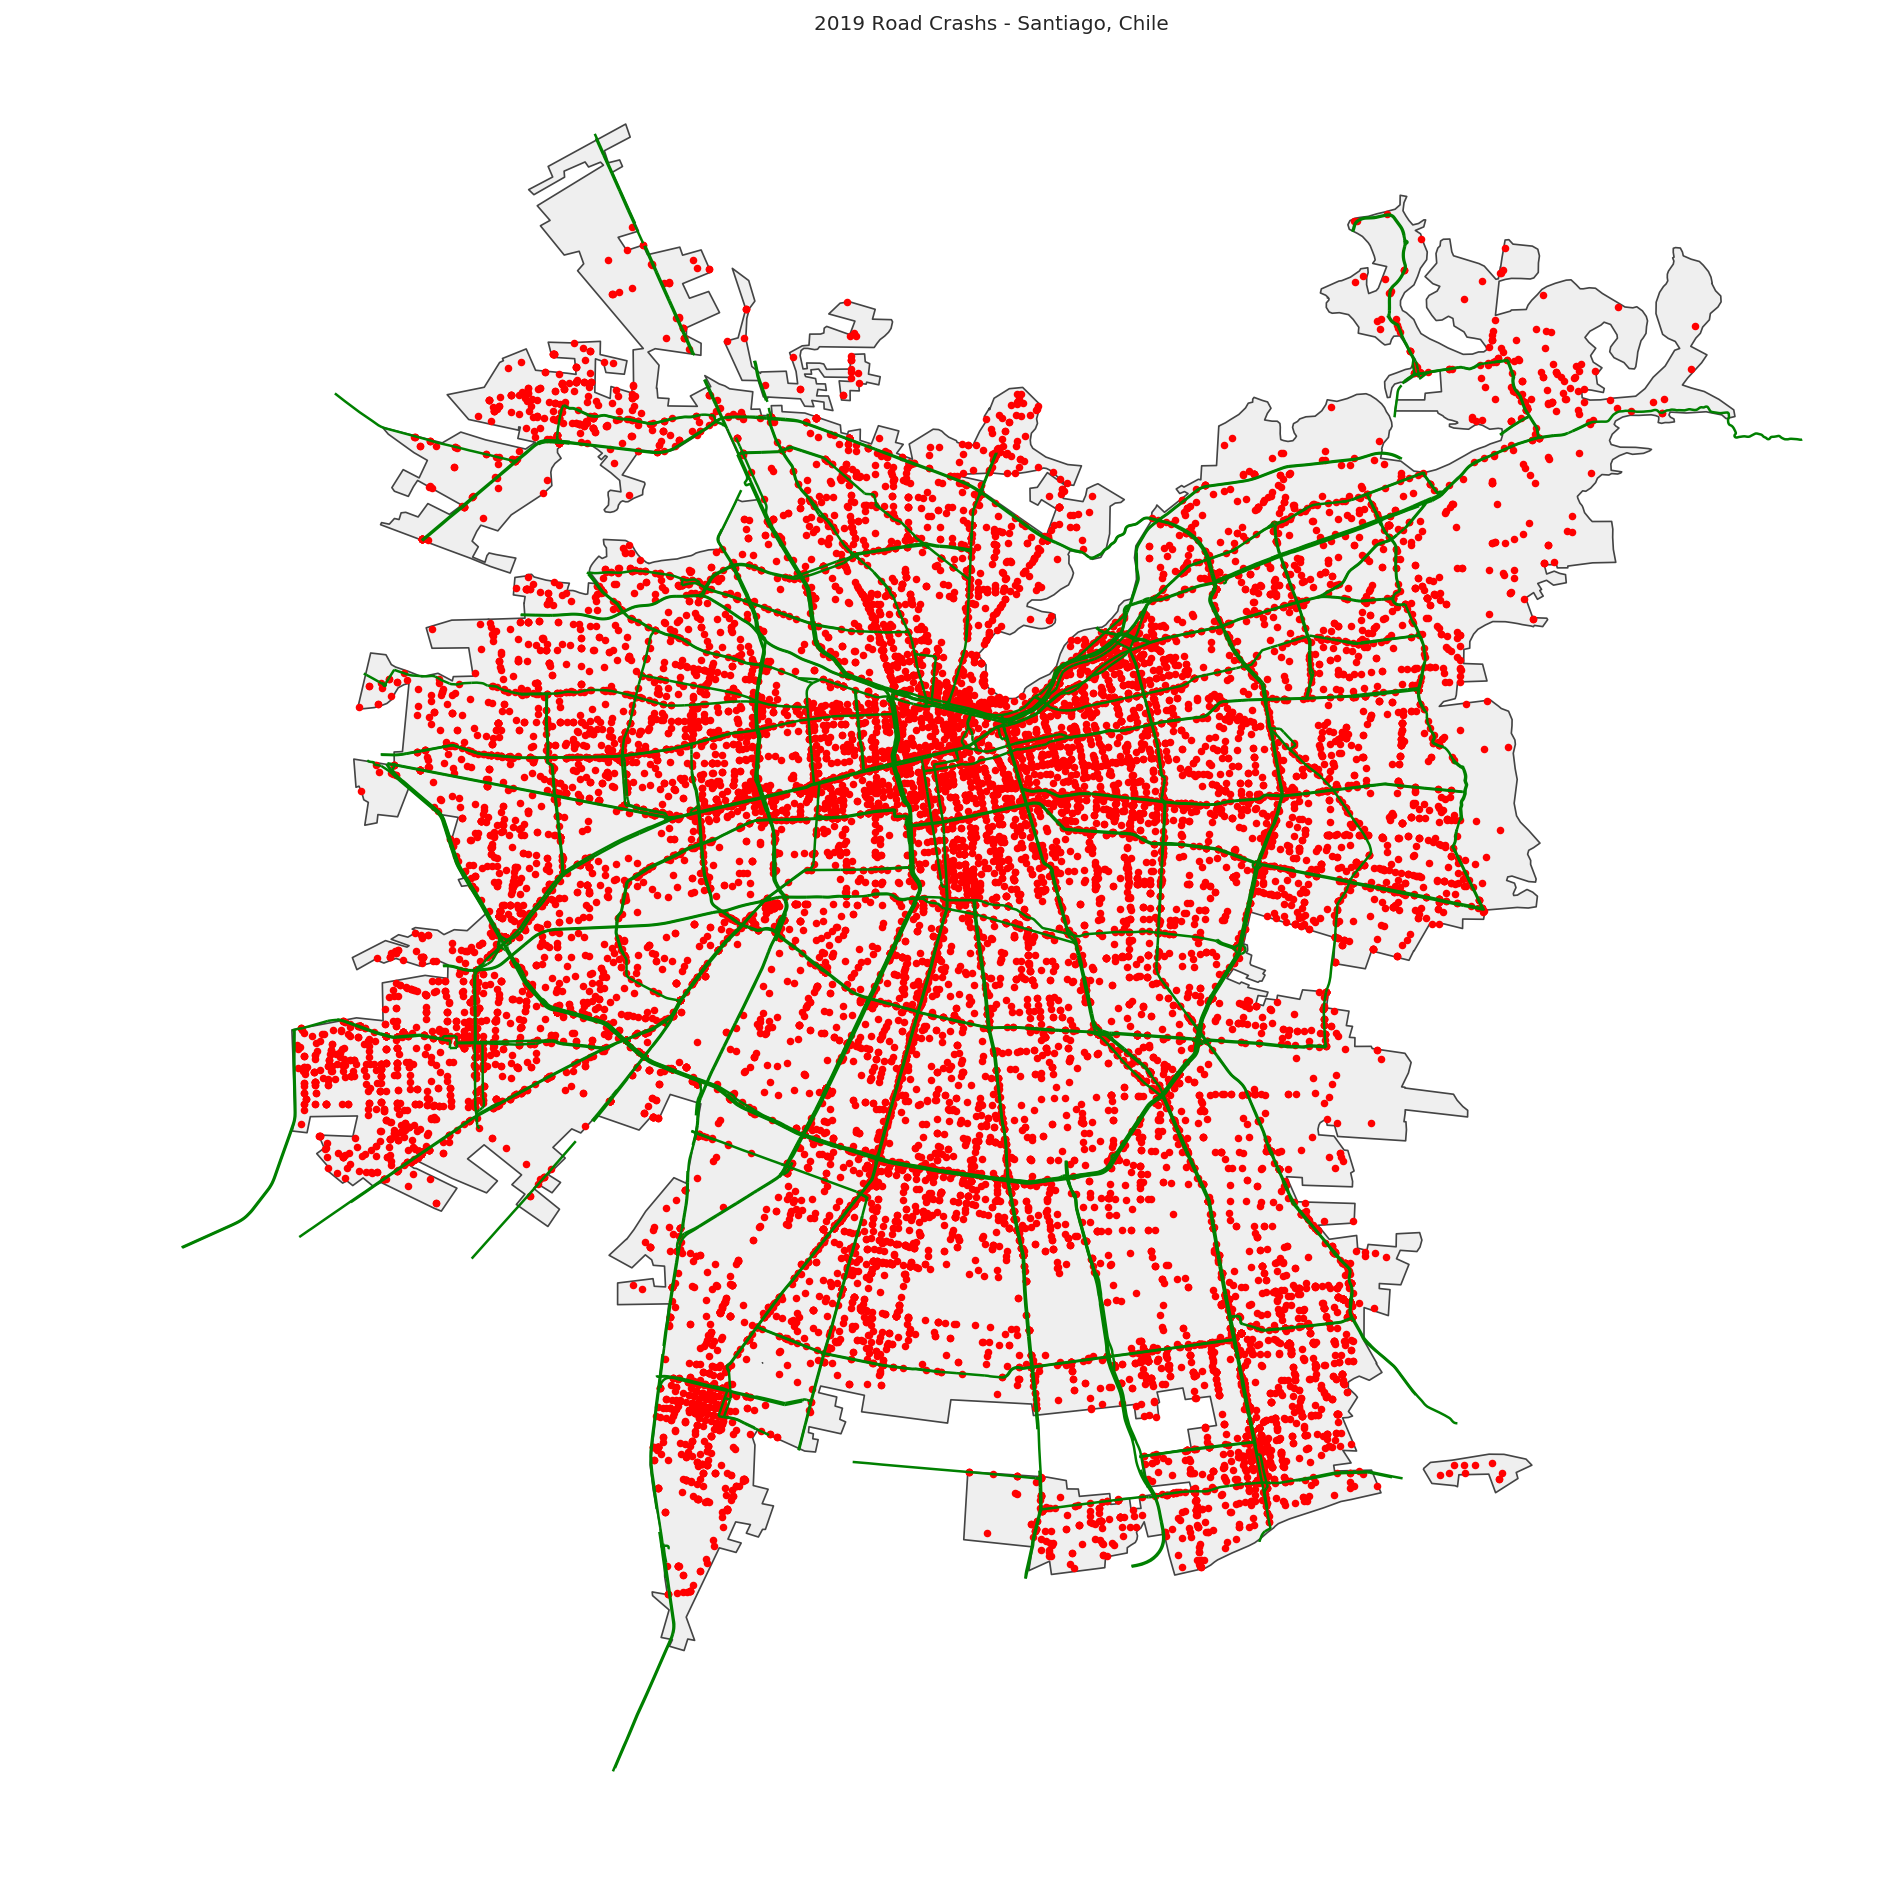

In [23]:
ax = stgo_shape.plot(figsize=(18, 16), color='#EFEFEF', edgecolor='#444444')
main_roads.plot(ax=ax, color='green', markersize=0.2)
crashes.plot(ax=ax, color='red', markersize=8)
plt.title("2019 Road Crashs - Santiago, Chile")
plt.axis('off')

## Digging into data

In [24]:
crashes.head(2)

,Ano,Idaccident,Codregion,Region,Comuna,Zona,Calle1,Calle2,Numero,lat,...,Estado_Cal,Cód_Condi,Condición,Cód_Est_1,Estado_Atm,Fallecidos,Graves,Menos_Grav,Leves,geometry
0,2019,1167981,13,REGION METROPOLITANA,PUENTE ALTO,URBANA,DOMINGO TOCORNAL,JUAN DE DIOS MALEBRAN,NULL,-33.604076,...,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,POINT (-70.58776 -33.60408)
1,2019,1188851,13,REGION METROPOLITANA,PUENTE ALTO,URBANA,JUAN DE DIOS MALEBRAN,DOMINGO TOCORNAL,NULL,-33.604076,...,BUENO,1,SECO,1,DESPEJADO,0,0,0,0,POINT (-70.58776 -33.60408)


In [25]:
crashes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19925 entries, 0 to 19924
Data columns (total 45 columns):
Ano           19925 non-null int64
Idaccident    19925 non-null int64
Codregion     19925 non-null int64
Region        19925 non-null object
Comuna        19925 non-null object
Zona          19925 non-null object
Calle1        19925 non-null object
Calle2        19925 non-null object
Numero        19925 non-null object
lat           19925 non-null float64
lng           19925 non-null float64
Claseaccid    19925 non-null int64
Fecha         19925 non-null object
Cód_Comun     19925 non-null int64
Cód_Tipo_     19925 non-null int64
Tipo_Accid    19925 non-null object
Cód_Tipo1     19925 non-null int64
Tipo__CONA    19925 non-null object
Cód_Zona      19925 non-null int64
Zona_1        19925 non-null object
Cód_Ubica     19925 non-null int64
Ubicación     19925 non-null object
Cód_Causa     19925 non-null int64
Causa__CON    19925 non-null object
Cód_Cau_1     19925 non-nul

In [26]:
crashes.Tipo__CONA.value_counts()

COLISION     12833
CHOQUE        4198
ATROPELLO     1907
CAIDA          363
VOLCADURA      336
OTRO TIPO      285
INCENDIO         3
Name: Tipo__CONA, dtype: int64

In [27]:
crashes.Zona.value_counts()

URBANA    19909
RURAL        16
Name: Zona, dtype: int64

In [28]:
crashes.Ubicación.value_counts()

TRAMO DE VIA RECTA                8714
CRUCE CON SEMAFORO FUNCIONANDO    5218
OTROS NO CONSIDERADOS             1863
CRUCE CON SEÑAL PARE              1846
CRUCE CON SEÑAL CEDA EL PASO      1157
CRUCE SIN SEÑALIZACION             687
CRUCE CON SEMAFORO APAGADO         145
ACERA O BERMA                       88
ROTONDA                             71
TRAMO DE VIA CURVA HORIZONTAL       45
ENLACE A NIVEL                      26
TRAMO DE VIA CURVA VERTICAL         19
TUNEL                               13
CRUCE REGULADO POR CARABINERO       11
ENLACE A DESNIVEL                   10
ACCESO NO HABILITADO                 6
PLAZA DE PEAJE                       4
PUENTE                               2
Name: Ubicación, dtype: int64

In [29]:
crashes.Calzada.value_counts()

BIDIRECCIONAL                 9226
UNIDIRECCIONAL                6010
BIDIRECCIONAL CON BANDEJON    4689
Name: Calzada, dtype: int64

In [30]:
crashes.Tipo_Calza.value_counts()

ASFALTO     12425
CONCRETO     7110
MIXTO         333
ADOQUIN        49
RIPIO           4
TIERRA          4
Name: Tipo_Calza, dtype: int64

In [31]:
crashes.Condición.value_counts()

SECO          19309
HUMEDO          333
MOJADO          212
OTROS            35
CON ACEITE       12
ESCARCHA          8
GRAVILLA          4
CON BARRO         3
CON NIEVE         1
Name: Condición, dtype: int64

In [32]:
crashes.Estado_Atm.value_counts()

DESPEJADO    18733
NUBLADO       1006
LLUVIA         126
LLOVIZNA        50
NEBLINA         10
Name: Estado_Atm, dtype: int64

## Visualization

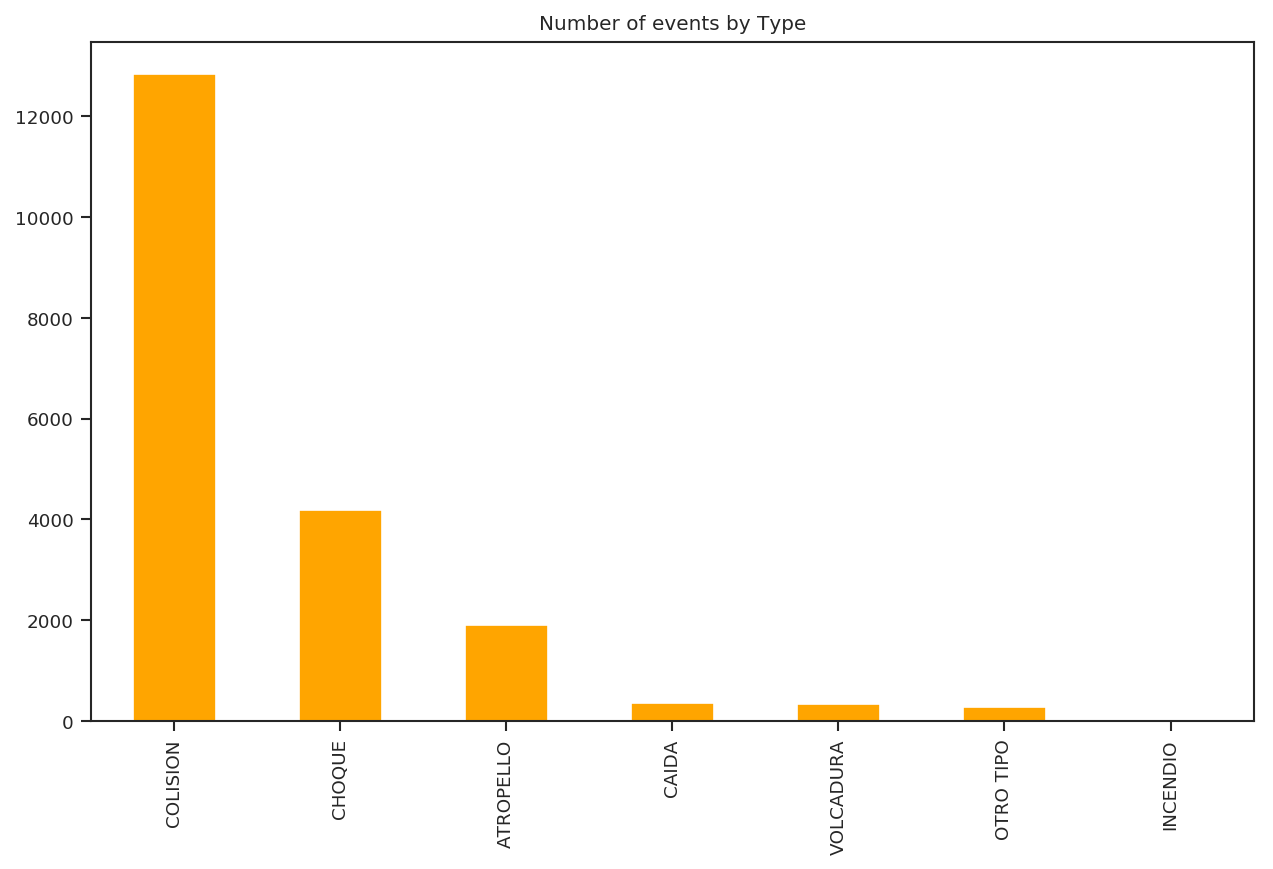

In [33]:
type = crashes.Tipo__CONA.value_counts()
type.plot.bar(title="Number of events by Type", color = 'orange');

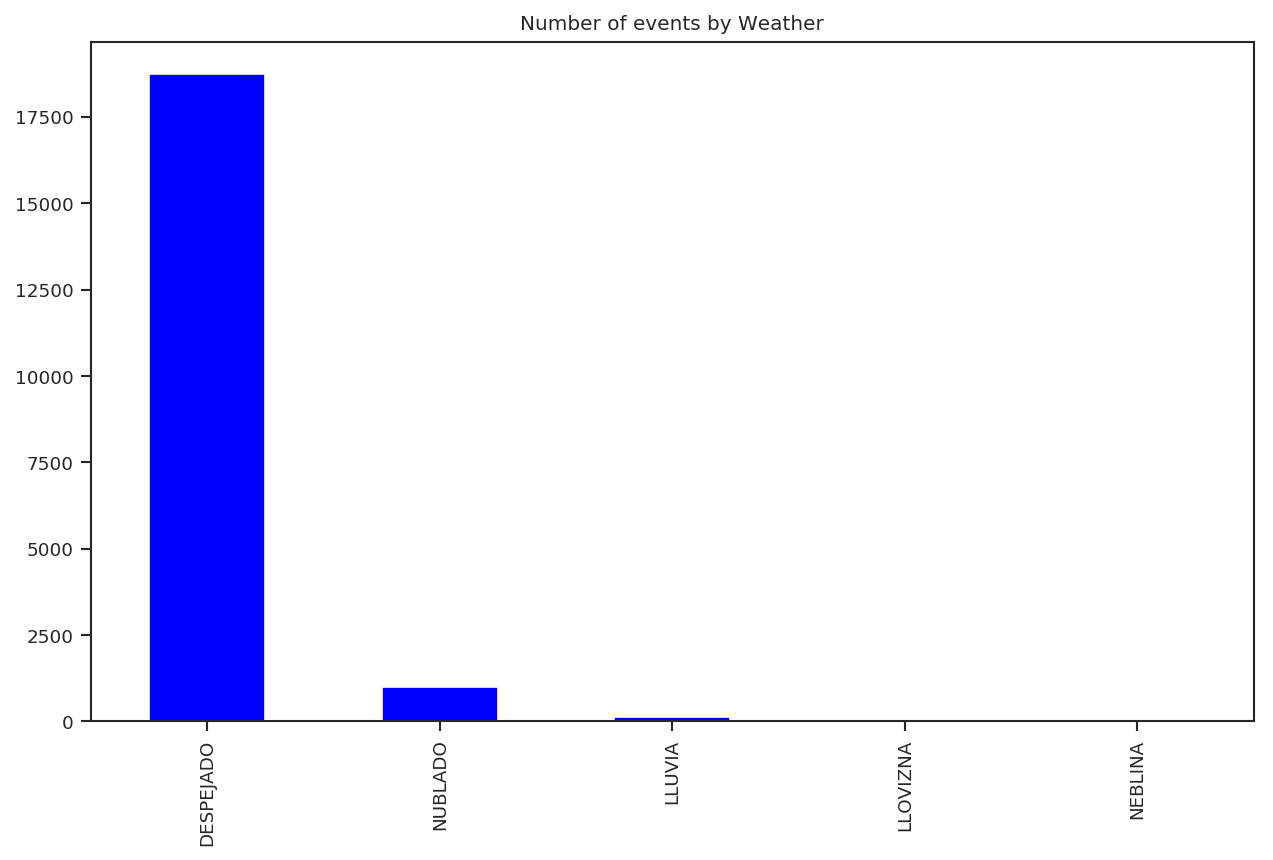

In [34]:
weather = crashes.Estado_Atm.value_counts()
weather.plot.bar(title="Number of events by Weather", color = 'blue');

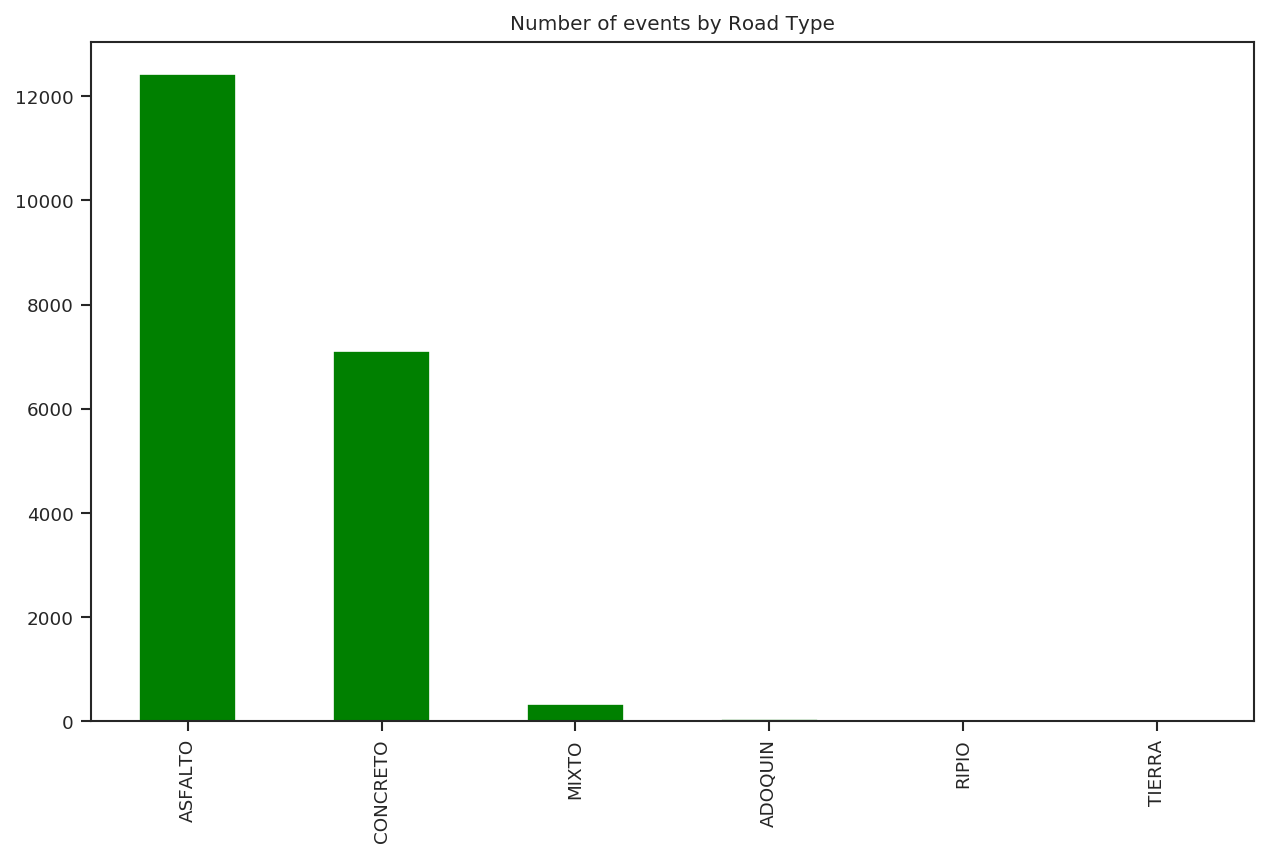

In [35]:
road_type = crashes.Tipo_Calza.value_counts()
road_type.plot.bar(title="Number of events by Road Type", color = 'green')

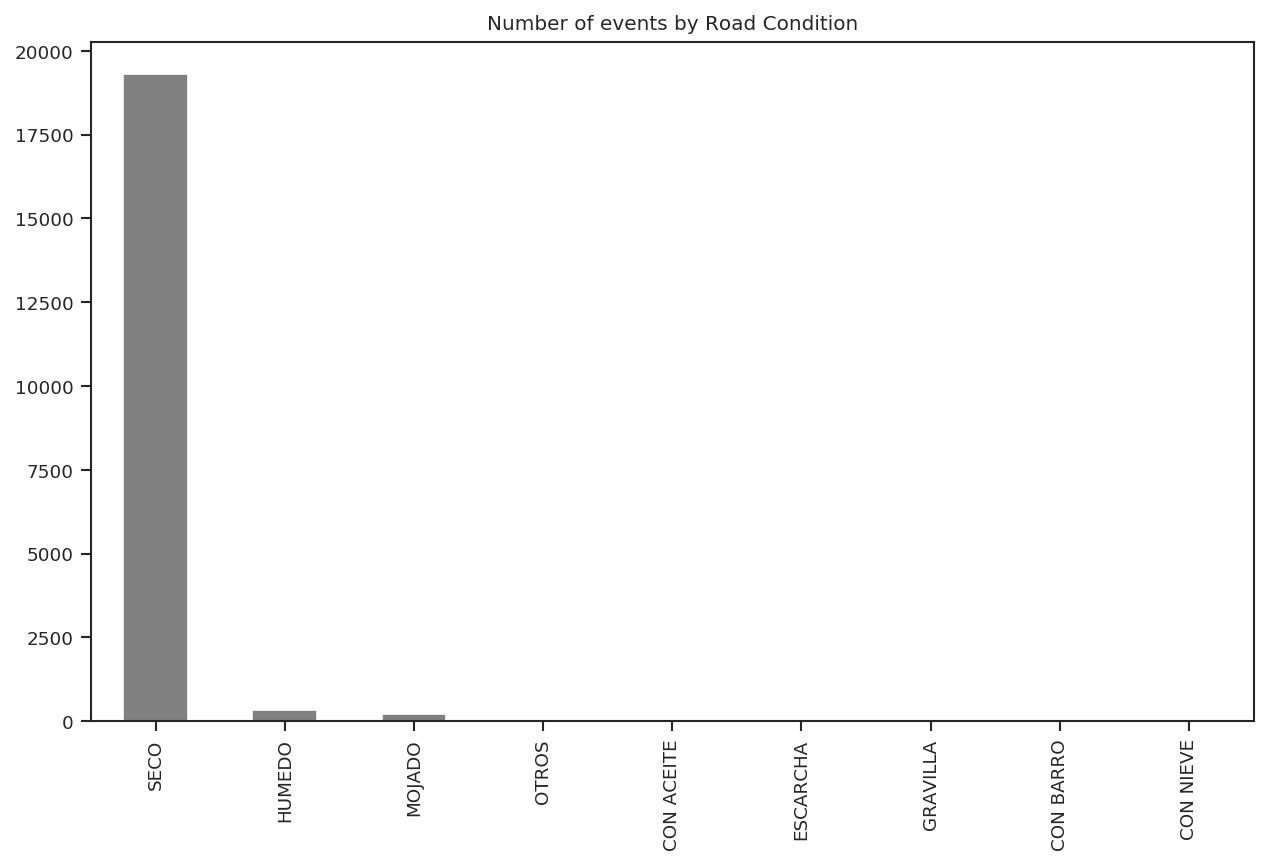

In [36]:
road_cond = crashes.Condición.value_counts()
road_cond.plot.bar(title="Number of events by Road Condition", color = 'gray')

In [37]:
crashes['Fecha'] = pd.to_datetime(crashes['Fecha'])

In [38]:
crashes['month'] = crashes['Fecha'].dt.month
crashes['day'] = crashes['Fecha'].dt.day
crashes['weekday'] = crashes['Fecha'].dt.day_name()

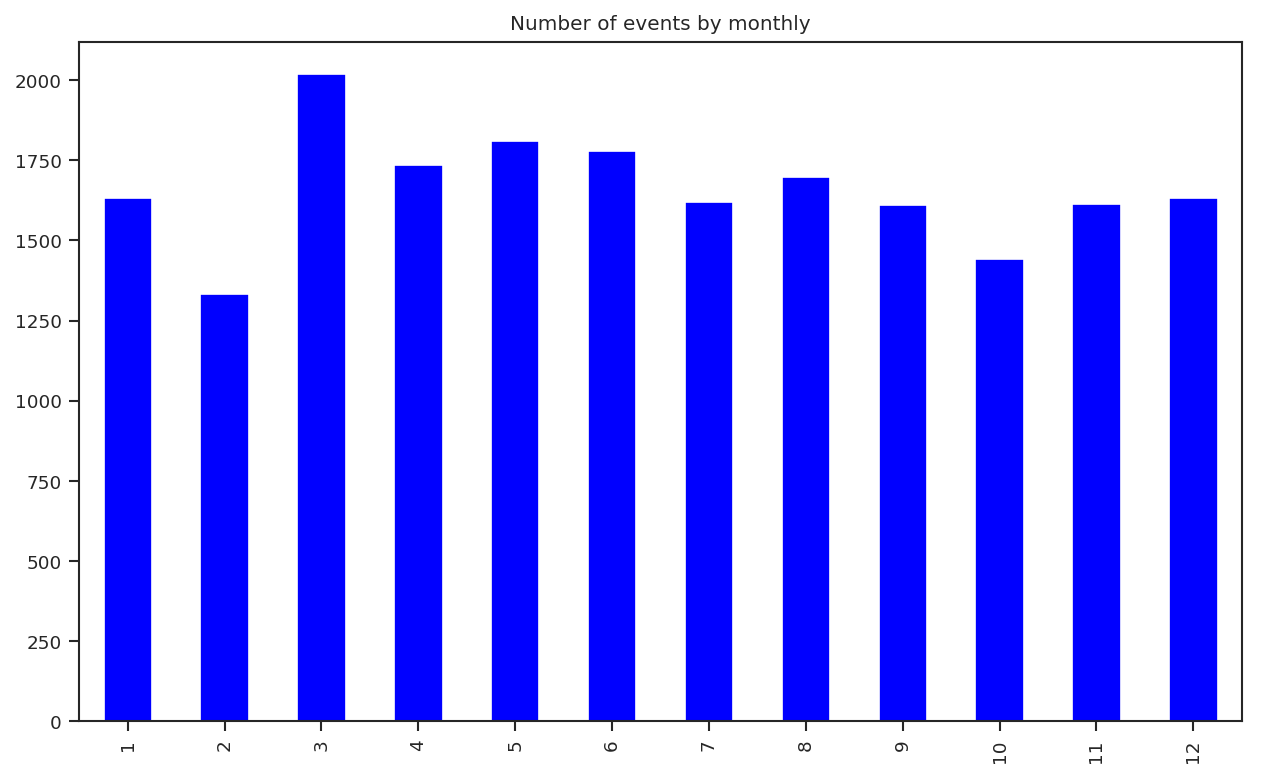

In [39]:
month = (crashes.month.value_counts()).sort_index()
month.plot.bar(title="Number of events by monthly", color = 'blue');

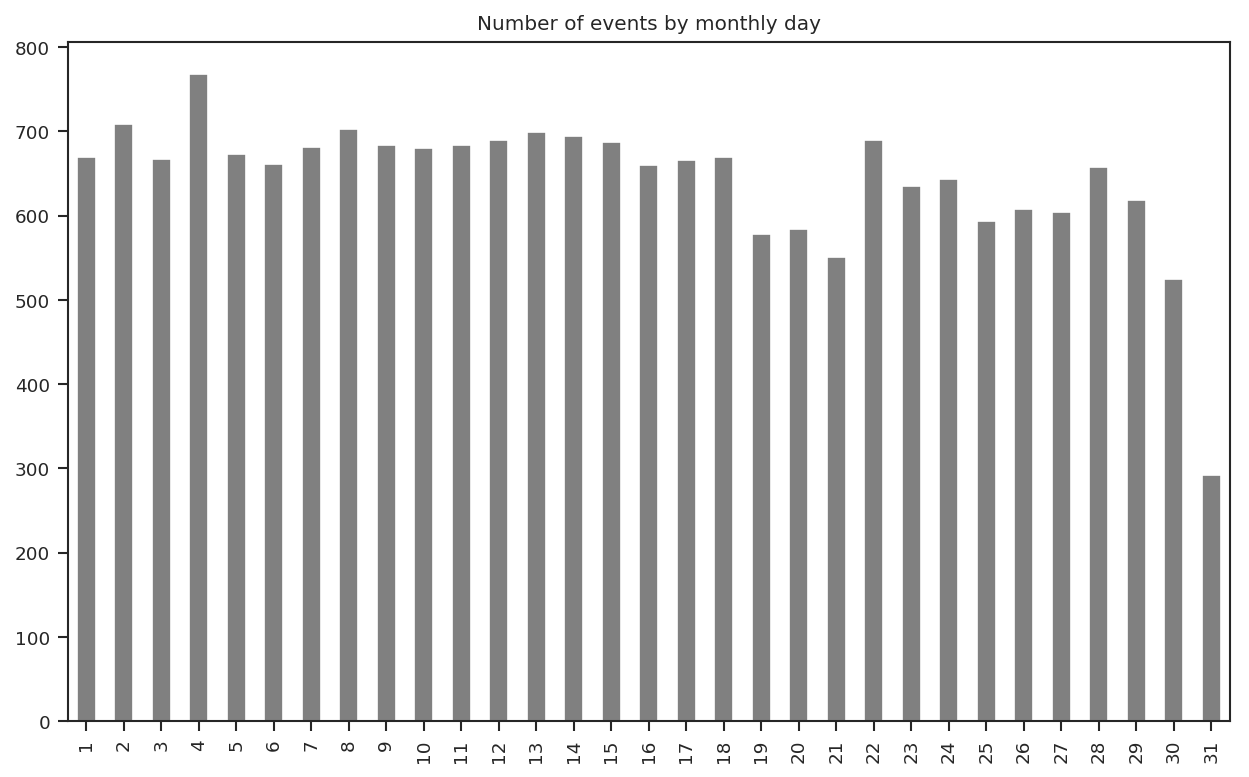

In [40]:
day = (crashes.day.value_counts()).sort_index()
day.plot.bar(title="Number of events by monthly day", color = 'gray');

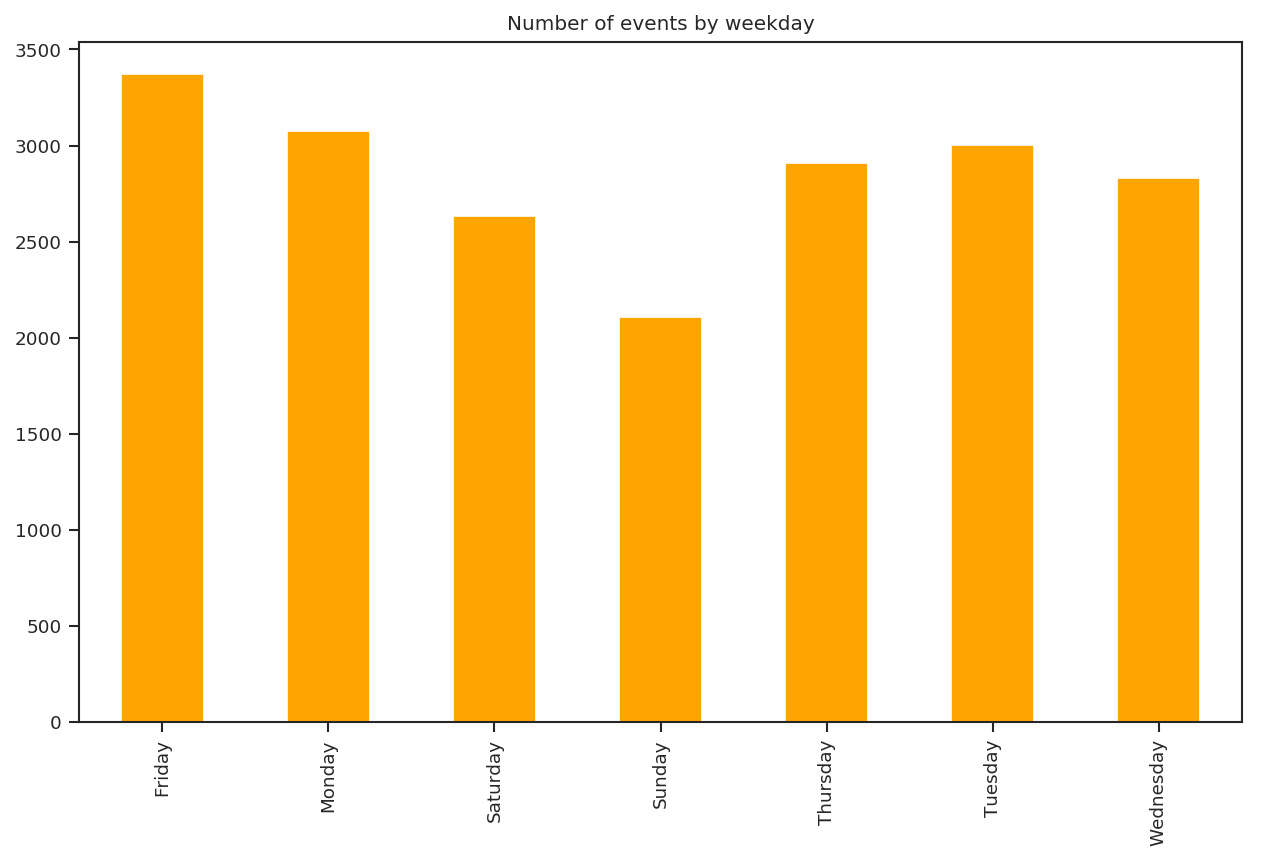

In [41]:
weekday = (crashes.weekday.value_counts()).sort_index()
weekday.plot.bar(title="Number of events by weekday", color = 'orange');

## Splitting the city in zones

- [Dataset can be downloaded from SECTRA (Transport Planning Secretary - Chile)](http://www.sectra.gob.cl/encuestas_movilidad/encuestas_movilidad.htm)

In [42]:
urban_zones = gpd.read_file("../data/Zonificacion_2012/Zonificacion_2012.gpkg", layer='zones')

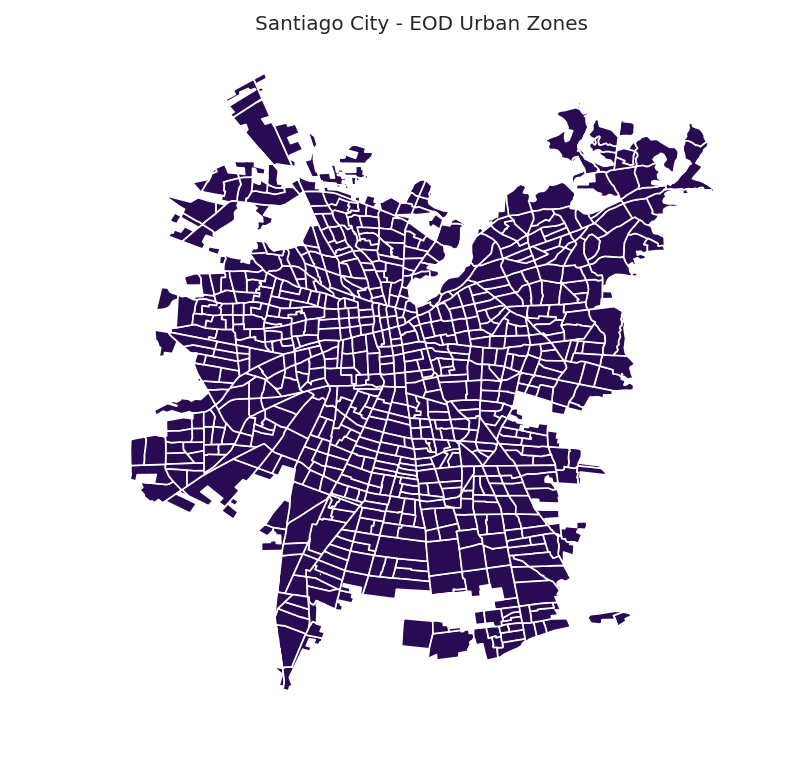

In [43]:
urban_zones.plot();
plt.axis('off');
plt.title("Santiago City - EOD Urban Zones");

## Aggregating events to city zones and creating a Heat Map

In [44]:
crash_zone_2019 = gpd.sjoin(urban_zones, crashes, how='left', op='intersects')
#crash_zone_2019.head()

In [45]:
crash_zone_2019 = crash_zone_2019.fillna(0)

NotImplementedError: fillna currently only supports filling with a scalar geometry

In [ ]:
crash_zone_2019 = crash_zone_2019.rename(columns={'index_right':'crashes'})

In [ ]:
crash_zone_2019['crashes'] = crash_zone_2019['crashes'].apply(lambda x: 0 if x== 0 else 1)
crash_zone_2019.crashes.value_counts()

In [ ]:
crash_zone_2019 = crash_zone_2019.groupby('Zona_left', as_index=False).agg({
  'crashes': 'sum', 
  'geometry': 'first',
  })
crash_zone_2019 = gpd.GeoDataFrame(crash_zone_2019)

In [ ]:
crash_zone_2019.shape

In [ ]:
crash_zone_2019.sample(10)

In [ ]:
ax = crash_zone_2019.plot(column='crashes', cmap='magma_r', k=5, legend=True)
plt.title("2019 Crashes by Zone - Santiago");
ax.set_axis_off()

In [ ]:
fig, ax = plt.subplots(figsize = (10,6)) 
crash_zone_2019.plot(ax=ax, column='crashes', cmap='magma_r', k=5, legend=True)
main_roads.plot(ax=ax, color = 'blue')
plt.title("2019 Crashes by Urban Zone and main roads - Santiago City");
ax.set_axis_off();

## Topographic Map

In [ ]:
def plot_point_distribution(**kwargs):
    #print(kwargs)
    ax = plt.gca()
    
    # context!
    context.plot(ax=ax, alpha=0.7, color='grey')
    
    color = kwargs.pop('color')
    geodf = kwargs.pop('data')
    bounds = kwargs.pop('bounds', None)

    sns.kdeplot(geodf.geometry.x, geodf.geometry.y, **kwargs)

    if bounds is not None:
        plt.xlim(bounds[:,0])
        plt.ylim(bounds[:,1])
    
    plt.axis('equal')
    plt.axis('off')

In [ ]:
def plot_heat_map(data, label, context):
    g = sns.FacetGrid(data=data, 
                      size=6, 
                      dropna=False
                     );

    g.map_dataframe(plot_point_distribution, 
                    shade=True, 
                    alpha=0.7, 
                    cbar=True, 
                    cmap='magma_r', 
                    cbar_kws={'orientation': 'horizontal',
                              'label': label,
                              'fraction': 0.02,
                              'shrink': 0.35,
                              'pad': 0}
                   );

In [ ]:
context = urban_zones.to_crs({'init': 'epsg:4326'})

In [ ]:
plot_heat_map(crashes, 'Number of Car Crashes - Santiago 2019', context)

plt.savefig('map.svg')

## Creating a Severity Index

In [ ]:
def sev_index_crash(row):
    if row['Fallecidos'] != 0: return 5
    elif row['Graves'] !=0: return 4
    elif row['Menos_Grav'] !=0: return 3
    elif row['Leves'] !=0: return 2
    else: return 1

In [ ]:
crashes['SEV_Index'] = crashes.apply(sev_index_crash, axis=1)
crashes.SEV_Index.value_counts()

In [ ]:
SEV_Index = crashes.SEV_Index.value_counts()
SEV_Index.plot.bar(title="Crash Severity Index", color = 'red');

## Associating severity index to roads

`For each road collect the crashes near it`

In [ ]:
car_roads.head(2)

In [ ]:
r = car_roads[['geometry', 'osm_id', 'name', 'fclass']].copy()

`Buffer crash points`
- once we are working with angles in degrees, we must convert meters to degrees:- 
- deg = (meters * 0.1) / 11000

In [ ]:
meters = 5
buffer = (meters*0.1)/11000  # degrees

In [ ]:
crashes.head()

In [ ]:
c = crashes[['geometry', 'SEV_Index']].copy()
c['geometry'] = c['geometry'].buffer(buffer)

`Spatial-join roads and buffered crash points` 

In [ ]:
f = gpd.sjoin(r, c, how='inner', op='intersects')

In [ ]:
f.head()

- Assign a crash score to each road.
- Define the number of crashes per meter.
- Define crashes by severity

In [ ]:
f['num_crashes'] = 1
g = f.groupby('osm_id', as_index=False).agg({
  'name': 'first',
  'num_crashes': 'sum', 
  'SEV_Index': 'sum',
  'geometry': 'first',
  })
g = gpd.GeoDataFrame(g)

In [ ]:
g.head()

In [ ]:
top_danger = g.sort_values(['SEV_Index'], ascending=False)[:10]
top_danger

In [ ]:
fig, ax = plt.subplots(figsize = (10,6)) 
g.plot(ax=ax, column='SEV_Index', cmap='magma_r', k=5, legend=True)
plt.title("2019 Severity Crashes by roads - Santiago City");
ax.set_axis_off();

In [ ]:
# Color-code roads by crash score with Spectra 

print(g.describe())

# Use Colorbrewer spectral colors
colors = reversed(['#d7191c', '#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba'])  
cuts = [0] + [g['SEV_Index'].quantile(k/125) for k in [25, 50, 75, 100, 125]]
scale = spectra.scale(colors).colorspace('lch').domain(cuts)
g['color'] = g['SEV_Index'].map(lambda x: scale(x).hexcode)

In [ ]:
def style(x):
    return {
        'color': x['properties']['color'],
        'weight': 5,
    }

In [ ]:
import json
lon, lat = top_danger.geometry.iat[0].coords[0]  # Center on crashiest segment road
m = folium.Map(location=[lat, lon],
               tiles="cartodbpositron",
               zoom_start=16)

geo = json.loads(g.sort_values('SEV_Index').to_json())
folium.GeoJson(geo, 
  style_function=style).add_to(m)

m